In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from scipy.signal import savgol_filter

In [54]:
data = pd.read_csv("milk.csv")
print(data.shape)
label = data["labels"]
data1 = data.iloc[:, 2:].values
data2 = data.iloc[:, 2:].values

(450, 603)


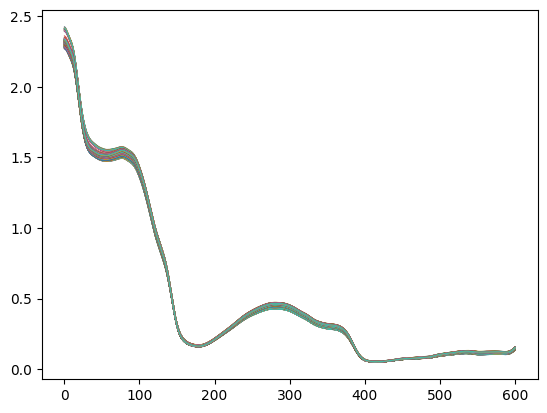

In [47]:
plt.plot(data1.T, linewidth=0.5)
plt.show()

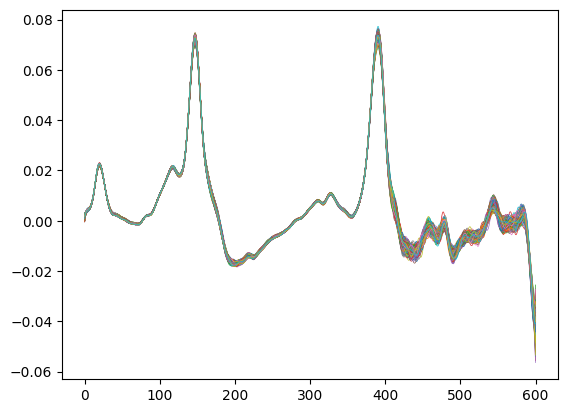

In [48]:
data2 = np.log(1.0/data2)
data2 = savgol_filter(data2, 25, polyorder = 5, deriv=1)
plt.plot(data2.T, linewidth=0.5)
plt.show()

In [49]:
scaler = StandardScaler()
data1 = scaler.fit_transform(data1)
scaler = StandardScaler()
data2 = scaler.fit_transform(data2)

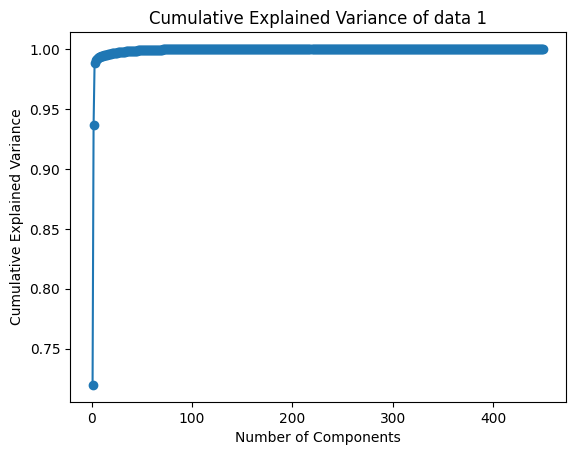

In [50]:
pca = PCA()
pca.fit(data1)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance of data 1')
plt.show()

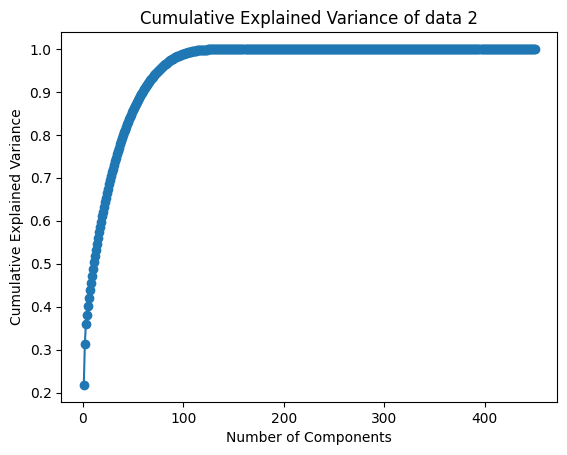

In [51]:
pca = PCA()
pca.fit(data2)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance of data 2')
plt.show()

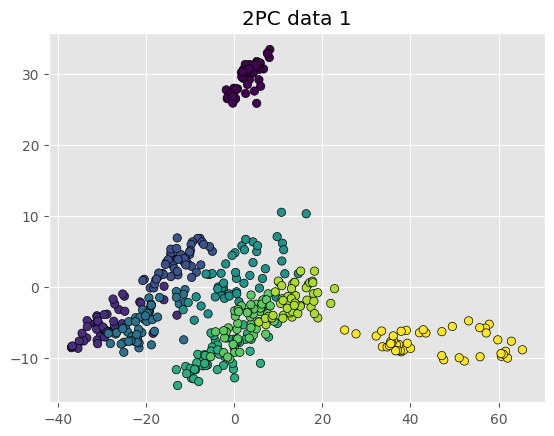

In [52]:
pca = PCA(2)
data1_pca = pca.fit_transform(data1)
with plt.style.context(('ggplot')):
    plt.scatter(data1_pca[:, 0], data1_pca[:, 1],c=label,edgecolors='k')
    plt.title("2PC data 1")
    plt.show()

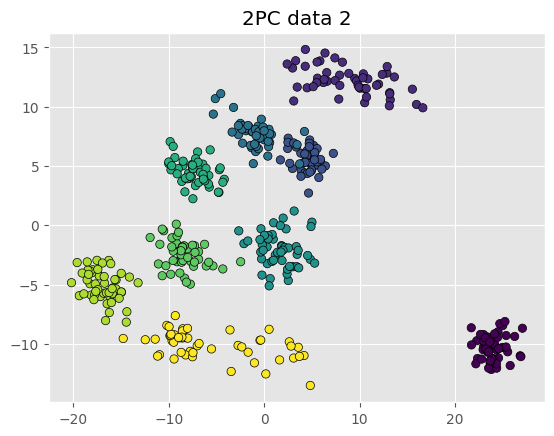

In [53]:
pca = PCA(2)
data2_pca = pca.fit_transform(data2)
with plt.style.context(('ggplot')):
    plt.scatter(data2_pca[:, 0], data2_pca[:, 1],c=label,edgecolors='k')
    plt.title("2PC data 2")
    plt.show()